In [10]:
import random
import string
import math

# Bloom filter
    
# null bit array
def empty_hash_table(N):
    return [0 for n in range(N)]

# p false positive rate, n number of items
def empty_bloom_filter(p,n):
    m = - math.floor((n * math.log(p))/(math.log(2)**2))
    bfilter_table = empty_hash_table(m)
    return bfilter_table
   
# use false postive ration to get number of hash functions
def required_k(p):
    k = (-1)* round(math.log(p,2))
    return k 

# add new element to filter
def insert(hash_table, item, hash_functions):
    N = len(hash_table)
    for i in range(len(hash_functions)):
        index = hash_functions[i](item) % N    
        hash_table[index] += 1
    return hash_table

# search for existence(chance of false positive)
def query(hash_table, item, hash_functions):
    N = len(hash_table)
    for i in range(len(hash_functions)):
        index = hash_functions[i](item) % N  
        if hash_table[index] == 0:
            return False
    return True

# delete element from bloom filter
def remove(hash_table, item, hash_functions):
    if not query(hash_table, item, hash_functions):
        raise ValueError()
    N = len(hash_table)
    for i in range(len(hash_functions)):
        index = hash_functions[i](item) % N
        if hash_table[index] != 0:
            hash_table[index] -= 1
    return hash_table



def make_hash_function(offset_size):
    def hash_function(string):
        # for offset in hash code
        for i in range(offset_size):
            string += "*"
        #actual hashcode(Hurner's Rule)
        ans = 0
        for i in range(len(string)):
            ans = 31*ans + ord(string[i])
        return ans # Inpired in Hurner's Rule
    return hash_function

# makes k hash functions
def hash_functions_generator(k):
    hashes_list = []
    for offset_size_i in range(0,k):
        hash_func = make_hash_function(offset_size_i)
        hashes_list.append(hash_func)
    return hashes_list

# rwg
def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

def randomwords_list(list_length, word_length):
    rword_list = []
    for i in range(list_length):
        rword = randomword(word_length)
        rword_list.append(rword)
    return rword_list

In [2]:
rword = randomword(11)

p = 0.1
n = 3

htable = empty_bloom_filter(p, n)

hashes_list = hash_functions_generator(4)

print("Given the desired false positive rate p: ", p)
print("Given the number of items to store n: ", n)
print("\nTable: ", htable)

print("\n...Adding x...")
insert(htable, "x", hashes_list)
print("...Adding y...")
insert(htable, "y", hashes_list)
print("...Adding z...\n")
insert(htable, "z", hashes_list)

print("\nTable: ", htable)


print("\nContains x?", query(htable, "z", hashes_list))
print("Contains y?", query(htable, "y", hashes_list))
print("Contains z?", query(htable, "z", hashes_list))

print("Contains a (An element that was never inserted) ?", query(htable, "a", hashes_list))



print("\n...Removing y...\n")
remove(htable, "y", hashes_list)
print("Table: ", htable)

print("\nContains x?", query(htable, "x", hashes_list))
print("Contains y?", query(htable, "y", hashes_list))
print("Contains z?", query(htable, "z", hashes_list))

print("\n...Removing x...\n")
remove(htable, "x", hashes_list)
print("Table: ", htable)
print("\nContains x?", query(htable, "x", hashes_list))
print("Contains y?", query(htable, "y", hashes_list))
print("Contains z?", query(htable, "z", hashes_list))

print("\n...Removing z...\n")
remove(htable, "z", hashes_list)
print("Table: ", htable)
print("\nContains x?", query(htable, "x", hashes_list))
print("Contains y?", query(htable, "y", hashes_list))
print("Contains z?", query(htable, "z", hashes_list))

print("\nTable: ", htable)

Given the desired false positive rate p:  0.1
Given the number of items to store n:  3

Table:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

...Adding x...
...Adding y...
...Adding z...


Table:  [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Contains x? True
Contains y? True
Contains z? True
Contains a (An element that was never inserted) ? False

...Removing y...

Table:  [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]

Contains x? True
Contains y? False
Contains z? True

...Removing x...

Table:  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]

Contains x? False
Contains y? False
Contains z? True

...Removing z...

Table:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Contains x? False
Contains y? False
Contains z? False

Table:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


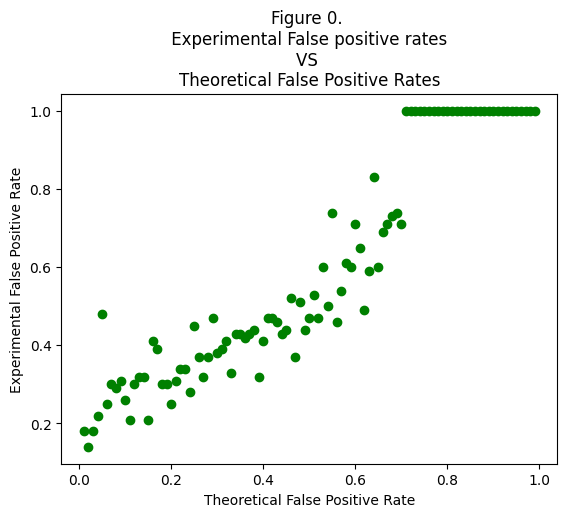

In [5]:
import matplotlib.pyplot as plt

theoretical_rates = []
p_rates = []

n = 100



for p in range(1,100):
    
    theoretical_p_rate = p / 100 
    
    k = required_k(theoretical_p_rate)
    hashes_list = hash_functions_generator(k)
    
    # Bloom Filter Table
    bfilter = empty_bloom_filter(theoretical_p_rate, n)
    
    # Produce a list of random words of size n
    rwords_list = randomwords_list(n,11)
    
    # Insert elements
    for i in range(len(rwords_list)):
        insert(bfilter, rwords_list[i], hashes_list)
        
        
    
    # Produce a list of *****FALSE***** random words of size n
    # we assumme it is very unlikely that the generator will produce a word that was produced the for the real list of inserted elements.
    FALSE_rwords_list = randomwords_list(n,11)
    
    false_positive_count = 0
    
    # Query the list n times, seeking "false" words in the list.
    for i in range(len(FALSE_rwords_list)):
        
        # As we are seeking for "false" words, we know that if the query returns true, it will be a false positive.
        false_positive = query(bfilter, FALSE_rwords_list[i], hashes_list)
        
        if (false_positive):
            false_positive_count +=1
            
    
    false_positive_rate = false_positive_count / n
    
    # APPEND THE RESULTS OF THE EXPERIMENT
    theoretical_rates.append(theoretical_p_rate)
    p_rates.append(false_positive_rate)
    
    

    
    
# Time to plot the results.
plt.scatter(theoretical_rates,p_rates,c='g')
# Improve the layout of the graph
plt.title('Figure 0. \n Experimental False positive rates \nVS \nTheoretical False Positive Rates')
plt.xlabel('Theoretical False Positive Rate')
plt.ylabel('Experimental False Positive Rate')

plt.show()

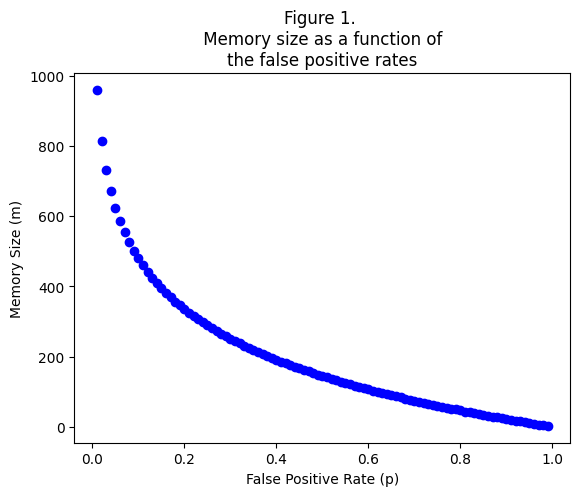

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt

# False positive rates list
p_rates = []
# Memory size
m_sizes = []

# Items n
n = 100



for p in range (1,100): #from probability 1% to 100%
    # Produce a list of random words of size n
    rword_list = randomwords_list(n,11)
    
    # false positive rate
    p_rate = p / 100 # We need to use the value as a value frm 0 to 1
    
    # corresponding k
    k = required_k(p_rate)
    hashes_list = hash_functions_generator(k)
    
    # Bloom Filter Table
    bfilter = empty_bloom_filter(p_rate, n)
    
    # Insert elements - **not necessary**, as 
    # we are only interested in the size of the table m.
    # But we'll do it for the sake of full expliciteness...
    for i in range(len(rword_list)):
        insert(bfilter, rword_list[i], hashes_list)
        
        
    # Append the information and results of this experiment.
    m_sizes.append(len(bfilter))
    p_rates.append(p_rate)
    
    
# Time to plot the results.
plt.scatter(p_rates,m_sizes,c='b')
# Improve the layout of the graph
plt.title('Figure 1. \n Memory size as a function of \nthe false positive rates')
plt.xlabel('False Positive Rate (p)')
plt.ylabel('Memory Size (m)')

plt.show()

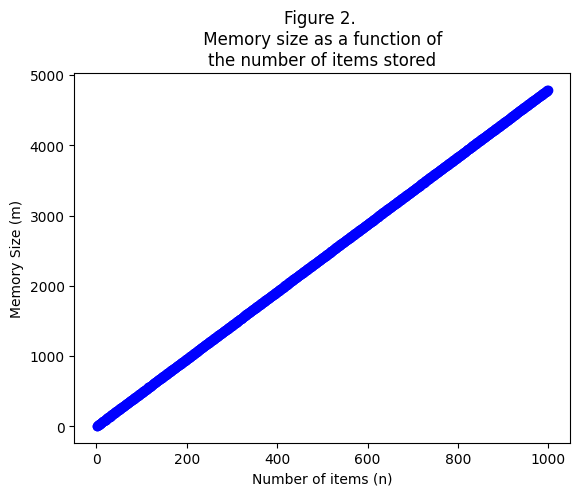

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Number of items stored n
n_sizes = []
# Memory size
m_sizes = []

# False positive rate p
p = 0.1
k = required_k(p) # yields k = 3

hashes_list = hash_functions_generator(k)



for n in range (1,1000): #from n = 1 to n = 1000
    # Produce a list of random words of size n
    rword_list = randomwords_list(n,11)
    
        
    # Bloom Filter Table
    bfilter = empty_bloom_filter(p, n)
    
    # Insert elements - **not necessary**, as 
    # we are only interested in the size of the table m.
    # But we'll do it for the sake of full expliciteness...
    for i in range(len(rword_list)):
        insert(bfilter, rword_list[i], hashes_list)
        
        
    # Append the information and results of this experiment.
    n_sizes.append(n)
    m_sizes.append(len(bfilter))
    
    
# Time to plot the results.
plt.scatter(n_sizes,m_sizes,c='b')
# Improve the layout of the graph
plt.title('Figure 2. \n Memory size as a function of \nthe number of items stored')
plt.xlabel('Number of items (n)')
plt.ylabel('Memory Size (m)')

plt.show()

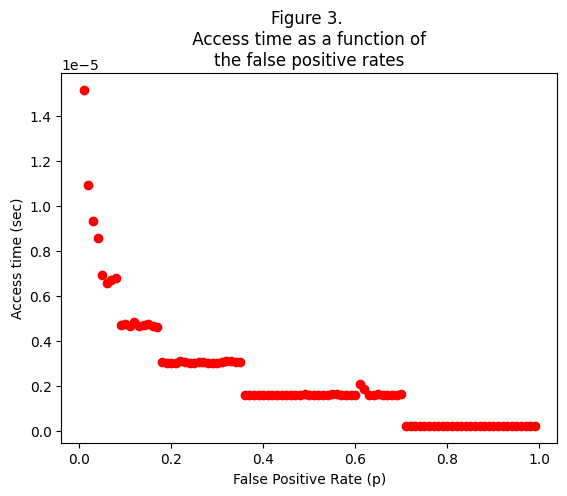

In [8]:
# Import necessary libraries
import time
import matplotlib.pyplot as plt

# False positive rates list
p_rates = []
# Access times
all_access_times = []

# Items n
n = 10000



for p in range (1,100): #from probability 1% to 100%
    # Produce a list of random words of size n
    rword_list = randomwords_list(n,11)
    
    # false positive rate
    p_rate = p / 100 # We will use the value as a decimal
    
    # corresponding k
    k = required_k(p_rate)
    hashes_list = hash_functions_generator(k)
    
    # Bloom Filter Table
    bfilter = empty_bloom_filter(p_rate, n)
    
    # Insert elements
    for i in range(len(rword_list)):
        insert(bfilter, rword_list[i], hashes_list)
        
    # Track access time, by accessing all elements and taking the avg
    start_time = time.time()
    
    for i in range(len(rword_list)):
        query(bfilter,rword_list[i],hashes_list)
    
    total_time = time.time() - start_time
    
    # access_time stands for the time it takes to access any given element
    # under this circumnstances (i.g., m being of a particular size)
    access_time = total_time / n
    
    # Append the information and results of this experiment.
    p_rates.append(p_rate)
    all_access_times.append(access_time)
    
    
# Time to plot the results.
plt.scatter(p_rates,all_access_times,c='r')
# Improve the layout of the graph
plt.title('Figure 3. \n Access time as a function of \nthe false positive rates')
plt.xlabel('False Positive Rate (p)')
plt.ylabel('Access time (sec)')

plt.show()

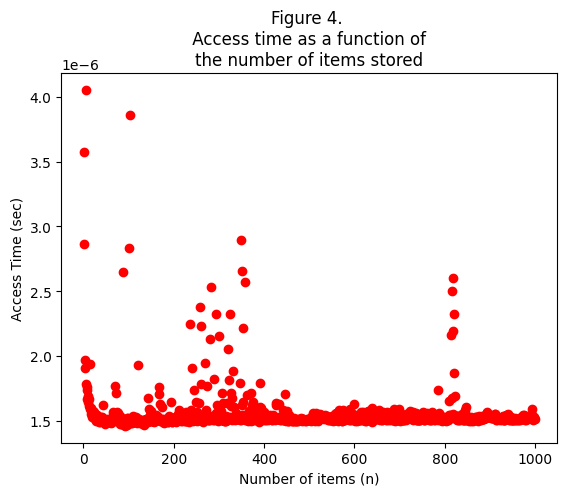

In [9]:
# Import necessary libraries
import time
import matplotlib.pyplot as plt

# Number of items stored
n_items = []
# Access times
all_access_times = []

# Hash functions to be used
p = 0.1
k = required_k(p)
hashes_list = hash_functions_generator(k)

# Track the access times for the interval m [1,1000]

for n in range(1,1000):
    #Produce a list of random words of size n
    rword_list = randomwords_list(n,11)
    
    # Bloom Filter Table
    bfilter_table = empty_bloom_filter(p,n)
    
    # Insert elements
    for i in range(len(rword_list)):
        insert(bfilter_table, rword_list[i], hashes_list)
        
    # Track access time, by accessing all elements and taking the avg
    start_time = time.time()
    
    # ACCESS STUFF!!!!!!!
    for i in range(len(rword_list)):
        query(bfilter,rword_list[i],hashes_list)
    
    total_time = time.time() - start_time
    
    # access_time stands for the time it takes to access any given element
    # under this circumnstances (i.g., m being of a particular size)
    access_time = total_time / n
    
    # Append the information and results of this experiment
    n_items.append(n)
    all_access_times.append(access_time)
        

        
# Time to plot the results.
plt.scatter(n_items,all_access_times,c='r')
# Improve the layout of the graph
plt.title('Figure 4. \n Access time as a function of \nthe number of items stored')
plt.xlabel('Number of items (n)')
plt.ylabel('Access Time (sec)')

plt.show()